# Machine Learning Models for predicting if a Cheese is ORGANIC or not - based on data set  derived from the Data Set Originally provided at the Govenment of Canada Open Government Portal - Ghufran Uppal


# Introduction 

# Question(s) of Interest

In this Project, I will be building machine learning Models for predicting if a cheese is Organic (1.0)or Non-Organic (0.0) based on the data set provided to us. Organic cheeses are made with organic milk from farms that are concerned with respecting nature's balance and ensuring well - being of the animals.

I will start with the exploratory data analysis of the data set, followed by the creation of pandas data frame that will contain all the relevant features for building the machine learning model. This will be followed by building a pre-processor for processing the data frame, building a baseline model (using dummy classifier) and then building machine learning models using more advanced algorithms.For this classification problem, I will be using Random Forest Classifier and Linear Regressor algorithms for Building more adavanced Machine Learning Models.My positive label will be 1.0 (Organic)and I will be using F1 Score and recall score to judge my models.

At the same time, I will be keeping an eye on the training and testing scores to make sure that I have the right balance and my model is not under-fitting or over-fitting. 


In [1374]:
from hashlib import sha1
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt
import graphviz
import numpy as np
import pandas as pd
import string
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC, SVR

from scipy.stats import lognorm, loguniform, randint
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)

#alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# Expoloratory Data Analysis

Importing the data in the csv provided in the Project Data Folder 

In [1375]:
canadian_cheese = pd.read_csv ("data/canadianCheeseDirectory.csv")

Let us look at the data in the Data Frame canadian_cheese

In [1376]:
canadian_cheese.head(2)

,CheeseId,CheeseNameEn,CheeseNameFr,ManufacturerNameEn,ManufacturerNameFr,ManufacturerProvCode,ManufacturingTypeEn,ManufacturingTypeFr,WebSiteEn,WebSiteFr,...,Organic,CategoryTypeEn,CategoryTypeFr,MilkTypeEn,MilkTypeFr,MilkTreatmentTypeEn,MilkTreatmentTypeFr,RindTypeEn,RindTypeFr,LastUpdateDate
0,228,NaN,Sieur de Duplessis (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Firm Cheese,Pâte ferme,Ewe,Brebis,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03
1,242,NaN,Tomme Le Champ Doré,NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03


In [1377]:
canadian_cheese.describe()

,CheeseId,FatContentPercent,MoisturePercent,Organic
count,1451.000000,1042.000000,1031.000000,1451.000000
mean,1565.436940,26.625374,47.069544,0.083391
std,497.777745,7.308941,9.644527,0.276567
min,228.000000,1.000000,12.000000,0.000000
25%,1185.500000,24.000000,40.000000,0.000000
50%,1561.000000,27.000000,46.000000,0.000000
75%,2002.500000,31.000000,52.000000,0.000000
max,2391.000000,75.000000,92.000000,1.000000


In [1378]:
canadian_cheese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1451 non-null   int64  
 1   CheeseNameEn          584 non-null    object 
 2   CheeseNameFr          1083 non-null   object 
 3   ManufacturerNameEn    680 non-null    object 
 4   ManufacturerNameFr    964 non-null    object 
 5   ManufacturerProvCode  1451 non-null   object 
 6   ManufacturingTypeEn   1451 non-null   object 
 7   ManufacturingTypeFr   1451 non-null   object 
 8   WebSiteEn             875 non-null    object 
 9   WebSiteFr             784 non-null    object 
 10  FatContentPercent     1042 non-null   float64
 11  MoisturePercent       1031 non-null   float64
 12  ParticularitiesEn     505 non-null    object 
 13  ParticularitiesFr     504 non-null    object 
 14  FlavourEn             945 non-null    object 
 15  FlavourFr            

Based on the above, we can see that most of the columns are classified as type Object by Pandas, which mean that they would be containing Categorical, Binary, Text or other Type of Data. Let us look at our columns more closely

In [1379]:
canadian_cheese.columns

Index(['CheeseId', 'CheeseNameEn', 'CheeseNameFr', 'ManufacturerNameEn',
       'ManufacturerNameFr', 'ManufacturerProvCode', 'ManufacturingTypeEn',
       'ManufacturingTypeFr', 'WebSiteEn', 'WebSiteFr', 'FatContentPercent',
       'MoisturePercent', 'ParticularitiesEn', 'ParticularitiesFr',
       'FlavourEn', 'FlavourFr', 'CharacteristicsEn', 'CharacteristicsFr',
       'RipeningEn', 'RipeningFr', 'Organic', 'CategoryTypeEn',
       'CategoryTypeFr', 'MilkTypeEn', 'MilkTypeFr', 'MilkTreatmentTypeEn',
       'MilkTreatmentTypeFr', 'RindTypeEn', 'RindTypeFr', 'LastUpdateDate'],
      dtype='object')

Let us look at the Data contained in the following columns

In [1380]:
canadian_cheese_other_columns_1 = canadian_cheese[['WebSiteEn','WebSiteFr', 'LastUpdateDate']]

In [1381]:
canadian_cheese_other_columns_1

,WebSiteEn,WebSiteFr,LastUpdateDate
0,NaN,NaN,2016-02-03
1,NaN,NaN,2016-02-03
2,http://www.trestelle.ca/english/,http://www.trestelle.ca/francais/,2016-02-03
3,NaN,NaN,2016-02-03
4,NaN,NaN,2016-02-03
...,...,...,...
1446,http://https://www.knoydartfarm.org,NaN,2020-03-10
1447,http://www.fresk-o.com,NaN,2020-03-10
1448,http://www.blueharbourcheese.com,NaN,2020-03-06
1449,http://www.blueharbourcheese.com,NaN,2020-03-06


As these Column have Special Characters(Date Time) and do not seem to be correlated to our Prediction Variable as well, let us drop these columns

In [1382]:
canadian_cheese_rev_1=canadian_cheese.drop(columns =['WebSiteEn','WebSiteFr','LastUpdateDate'])

In [1383]:
canadian_cheese_rev_1.head(2)

,CheeseId,CheeseNameEn,CheeseNameFr,ManufacturerNameEn,ManufacturerNameFr,ManufacturerProvCode,ManufacturingTypeEn,ManufacturingTypeFr,FatContentPercent,MoisturePercent,...,RipeningFr,Organic,CategoryTypeEn,CategoryTypeFr,MilkTypeEn,MilkTypeFr,MilkTreatmentTypeEn,MilkTreatmentTypeFr,RindTypeEn,RindTypeFr
0,228,NaN,Sieur de Duplessis (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,24.2,47.0,...,9 mois,0,Firm Cheese,Pâte ferme,Ewe,Brebis,Raw Milk,Lait cru,Washed Rind,Croûte lavée
1,242,NaN,Tomme Le Champ Doré,NaN,Fromages la faim de loup,NB,Farmstead,Fermière,24.2,47.9,...,NaN,0,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Washed Rind,Croûte lavée


In [1384]:
canadian_cheese_other_columns_2 = canadian_cheese[['CheeseNameEn','CheeseNameFr']]

In [1385]:
canadian_cheese_other_columns_2

,CheeseNameEn,CheeseNameFr
0,NaN,Sieur de Duplessis (Le)
1,NaN,Tomme Le Champ Doré
2,Provolone Sette Fette (Tre-Stelle),Provolone Sette Fette (Tre-Stelle)
3,NaN,Geai Bleu (Le)
4,NaN,Gamin (Le)
...,...,...
1446,Knoydart,Knoydart
1447,FRESK-O,FRESK-O
1448,Electric Blue,Electric Blue
1449,Hip Hop,Hip Hop


In [1386]:
canadian_cheese_other_columns_2[['CheeseNameEn', 'CheeseNameFr']].isnull().sum()

CheeseNameEn    867
CheeseNameFr    368
dtype: int64

These Columns contianing Significant number of the null values and also do not relate to our target variable, so let us drop them

In [1387]:
canadian_cheese_rev_2=canadian_cheese_rev_1.drop(columns =['CheeseNameEn','CheeseNameFr','RindTypeEn'])

Let us look at the Data Frame after these column drops

In [1388]:
canadian_cheese_rev_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1451 non-null   int64  
 1   ManufacturerNameEn    680 non-null    object 
 2   ManufacturerNameFr    964 non-null    object 
 3   ManufacturerProvCode  1451 non-null   object 
 4   ManufacturingTypeEn   1451 non-null   object 
 5   ManufacturingTypeFr   1451 non-null   object 
 6   FatContentPercent     1042 non-null   float64
 7   MoisturePercent       1031 non-null   float64
 8   ParticularitiesEn     505 non-null    object 
 9   ParticularitiesFr     504 non-null    object 
 10  FlavourEn             945 non-null    object 
 11  FlavourFr             942 non-null    object 
 12  CharacteristicsEn     762 non-null    object 
 13  CharacteristicsFr     760 non-null    object 
 14  RipeningEn            742 non-null    object 
 15  RipeningFr           

Let us import the other csv file provided as a part of this Data Set and look at the Data

In [1389]:
cheese_data = pd.read_csv ("data/cheese_data.csv")

In [1390]:
cheese_data.head(2)

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat


In [1391]:
cheese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


As many of the columns contained in this data frame is same as the cheese data Data Frame,let us look at the columns which are present only in this data frame and which are of interest to us with regard to our prediction

In [1392]:
cols_to_use = cheese_data.columns.difference(canadian_cheese_rev_2.columns)
cols_to_use

Index(['CheeseName', 'FatLevel', 'RindTypeEn'], dtype='object')

In [1393]:
cheese_data_rev_1= cheese_data[['CheeseId','CheeseName','FatLevel']]
cheese_data_rev_1

,CheeseId,CheeseName,FatLevel
0,228,Sieur de Duplessis (Le),lower fat
1,242,Tomme Le Champ Doré,lower fat
2,301,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,Geai Bleu (Le),lower fat
4,319,Gamin (Le),lower fat
...,...,...,...
1037,2387,Knoydart,higher fat
1038,2388,FRESK-O,lower fat
1039,2389,Electric Blue,higher fat
1040,2390,Hip Hop,higher fat


let us merge the data so we are using the relevant information contained in both tables for our prediction

In [1394]:
merged_df = canadian_cheese_rev_2.merge(cheese_data_rev_1,how ='outer', on ='CheeseId')
merged_df.head(2)

,CheeseId,ManufacturerNameEn,ManufacturerNameFr,ManufacturerProvCode,ManufacturingTypeEn,ManufacturingTypeFr,FatContentPercent,MoisturePercent,ParticularitiesEn,ParticularitiesFr,...,Organic,CategoryTypeEn,CategoryTypeFr,MilkTypeEn,MilkTypeFr,MilkTreatmentTypeEn,MilkTreatmentTypeFr,RindTypeFr,CheeseName,FatLevel
0,228,NaN,Fromages la faim de loup,NB,Farmstead,Fermière,24.2,47.0,NaN,NaN,...,0,Firm Cheese,Pâte ferme,Ewe,Brebis,Raw Milk,Lait cru,Croûte lavée,Sieur de Duplessis (Le),lower fat
1,242,NaN,Fromages la faim de loup,NB,Farmstead,Fermière,24.2,47.9,NaN,NaN,...,0,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Croûte lavée,Tomme Le Champ Doré,lower fat


In [1395]:
merged_df.columns

Index(['CheeseId', 'ManufacturerNameEn', 'ManufacturerNameFr',
       'ManufacturerProvCode', 'ManufacturingTypeEn', 'ManufacturingTypeFr',
       'FatContentPercent', 'MoisturePercent', 'ParticularitiesEn',
       'ParticularitiesFr', 'FlavourEn', 'FlavourFr', 'CharacteristicsEn',
       'CharacteristicsFr', 'RipeningEn', 'RipeningFr', 'Organic',
       'CategoryTypeEn', 'CategoryTypeFr', 'MilkTypeEn', 'MilkTypeFr',
       'MilkTreatmentTypeEn', 'MilkTreatmentTypeFr', 'RindTypeFr',
       'CheeseName', 'FatLevel'],
      dtype='object')

In [1396]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1451 non-null   int64  
 1   ManufacturerNameEn    680 non-null    object 
 2   ManufacturerNameFr    964 non-null    object 
 3   ManufacturerProvCode  1451 non-null   object 
 4   ManufacturingTypeEn   1451 non-null   object 
 5   ManufacturingTypeFr   1451 non-null   object 
 6   FatContentPercent     1042 non-null   float64
 7   MoisturePercent       1031 non-null   float64
 8   ParticularitiesEn     505 non-null    object 
 9   ParticularitiesFr     504 non-null    object 
 10  FlavourEn             945 non-null    object 
 11  FlavourFr             942 non-null    object 
 12  CharacteristicsEn     762 non-null    object 
 13  CharacteristicsFr     760 non-null    object 
 14  RipeningEn            742 non-null    object 
 15  RipeningFr           

As Fat level is a  binary column, it is of interest to us and may be what we want to predict- Should we built 
a classifier for predicting Fat level?

In [1397]:
merged_df_fat_pct_level = merged_df[['CheeseId','FatContentPercent','FatLevel']]

In [1398]:
merged_df_fat_pct_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CheeseId           1451 non-null   int64  
 1   FatContentPercent  1042 non-null   float64
 2   FatLevel           1042 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 45.3+ KB


In [1399]:
merged_df_fat_pct_level.dropna( )

,CheeseId,FatContentPercent,FatLevel
0,228,24.2,lower fat
1,242,24.2,lower fat
2,301,24.0,lower fat
3,303,29.0,lower fat
4,319,24.6,lower fat
...,...,...,...
1446,2387,36.0,higher fat
1447,2388,25.0,lower fat
1448,2389,34.0,higher fat
1449,2390,40.0,higher fat


<AxesSubplot:ylabel='Frequency'>

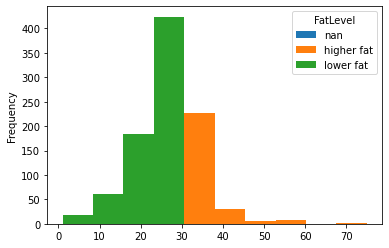

In [1400]:
merged_df_fat_pct_level.pivot(columns = 'FatLevel' , values = 'FatContentPercent', index = 'CheeseId').plot.hist()

In [1401]:
low = merged_df_fat_pct_level[merged_df_fat_pct_level['FatLevel'] == 'lower fat']
low

,CheeseId,FatContentPercent,FatLevel
0,228,24.2,lower fat
1,242,24.2,lower fat
2,301,24.0,lower fat
3,303,29.0,lower fat
4,319,24.6,lower fat
...,...,...,...
1442,2383,24.0,lower fat
1443,2384,24.0,lower fat
1444,2385,24.0,lower fat
1445,2386,24.0,lower fat


(array([  2.,  10.,   8.,  21.,   9.,  54.,  62.,  94., 201., 223.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

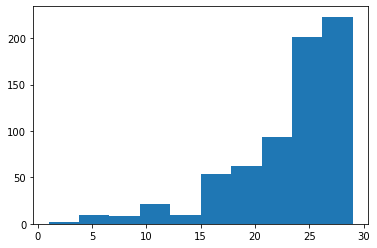

In [1402]:
plt.hist(low.FatContentPercent)

Importing the data in the Table cheese_data

In [1403]:
high = merged_df_fat_pct_level[merged_df_fat_pct_level['FatLevel'] == 'higher fat']
high

,CheeseId,FatContentPercent,FatLevel
12,414,33.0,higher fat
13,415,33.0,higher fat
14,416,33.0,higher fat
15,417,31.0,higher fat
16,418,33.0,higher fat
...,...,...,...
1439,2380,35.0,higher fat
1446,2387,36.0,higher fat
1448,2389,34.0,higher fat
1449,2390,40.0,higher fat


Let us look at the data in the Data Frame canadian_cheese

(array([286.,  42.,  13.,   5.,   3.,   3.,   4.,   0.,   1.,   1.]),
 array([30. , 34.5, 39. , 43.5, 48. , 52.5, 57. , 61.5, 66. , 70.5, 75. ]),
 <BarContainer object of 10 artists>)

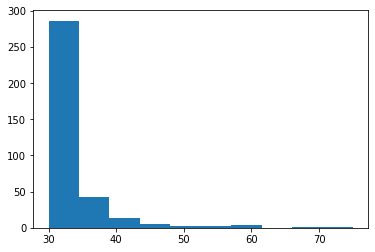

In [1404]:
plt.hist(high.FatContentPercent)

As indicated by the above histograms the Fat Level ( "HIGH" /"LOW") can be predicted based on the Fat Percent, there is a boundary at 30 percent, so any thing above 30 percent is High Level Fat and anything below 30 percent is low Fat. We therefore should not be needing machine learning to predict it.

Let us look at the Column Organic then , We will be predicting it instead and building our machine learning model accordingly

In [1405]:
merged_df.Organic.value_counts()

0    1330
1     121
Name: Organic, dtype: int64

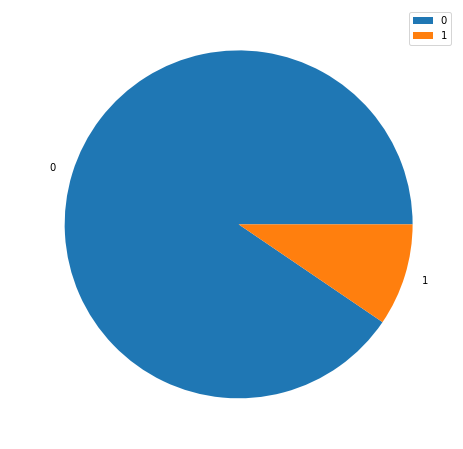

In [1406]:
pd.DataFrame(cheese_data.Organic.value_counts(normalize = True)).plot.pie(y = 'Organic', figsize = (10,8), ylabel = ' ')
plt.show()

Based on the above chart it is clear that we have un-balanced data in the Organic Column,we will be dealing with it accordingly when building our model

** Correlation between numeric columns

Let us create a coorelation matrix

In [1407]:
merged_df.corr()

,CheeseId,FatContentPercent,MoisturePercent,Organic
CheeseId,1.000000,0.006493,-0.011575,-0.032797
FatContentPercent,0.006493,1.000000,-0.690522,0.024411
MoisturePercent,-0.011575,-0.690522,1.000000,-0.113800
Organic,-0.032797,0.024411,-0.113800,1.000000


Based on this matrix, it looks that MoisturePercent is more related to Organic then FatPerecent

** Visual Represenatation of the Numeric Columns

<AxesSubplot:ylabel='Frequency'>

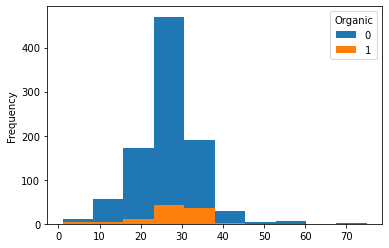

In [1408]:
merged_df.pivot(columns = 'Organic' , values = 'FatContentPercent', index = 'CheeseId').plot.hist()

<AxesSubplot:ylabel='Frequency'>

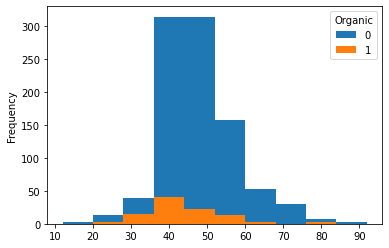

In [1409]:
merged_df.pivot(columns = 'Organic' , values = 'MoisturePercent', index = 'CheeseId').plot.hist()

Based on the above histograms , there is a large overlap of data between the Classes 0 and 1 of the Data set

** Visual Represenstation of the Categorical Data 

In [1410]:
manuf_df = merged_df.groupby(['ManufacturingTypeEn','Organic'])[['CheeseId']].count().reset_index()
manuf_df 

,ManufacturingTypeEn,Organic,CheeseId
0,Artisan,0,504
1,Artisan,1,41
2,Farmstead,0,236
3,Farmstead,1,68
4,Industrial,0,590
5,Industrial,1,12


In [1411]:
manuf_df['total'] =manuf_df.groupby(['Organic'])['CheeseId'].transform(sum) 

In [1412]:
manuf_df['ratio'] =100*(manuf_df['CheeseId']/manuf_df['total'])
manuf_df

,ManufacturingTypeEn,Organic,CheeseId,total,ratio
0,Artisan,0,504,1330,37.894737
1,Artisan,1,41,121,33.884298
2,Farmstead,0,236,1330,17.744361
3,Farmstead,1,68,121,56.198347
4,Industrial,0,590,1330,44.360902
5,Industrial,1,12,121,9.917355


In [1413]:
alt.Chart(manuf_df).mark_bar(size=20).encode(
    x='ManufacturingTypeEn:N',
    y='ratio:Q',
#     color='genre:N'
    color=alt.Color('Organic', scale=alt.Scale(scheme='category20b'))
).properties( width=80,
    height=250)

alt.Chart(...)

In [1414]:
manuf_df_organic= manuf_df[manuf_df['Organic']== 1]
manuf_df_organic

,ManufacturingTypeEn,Organic,CheeseId,total,ratio
1,Artisan,1,41,121,33.884298
3,Farmstead,1,68,121,56.198347
5,Industrial,1,12,121,9.917355


In [1415]:
plot_organic =alt.Chart(manuf_df_organic).mark_bar().encode(
                    x =alt.X("ManufacturingTypeEn",sort ='y',title="Manufacturing Type"),
                    y= alt.Y("CheeseId:Q",title=" count")).properties (width =200, height =200)
                    
plot_organic

alt.Chart(...)

In [1416]:
manuf_df_non_organic= manuf_df[manuf_df['Organic']== 0]
manuf_df_non_organic

,ManufacturingTypeEn,Organic,CheeseId,total,ratio
0,Artisan,0,504,1330,37.894737
2,Farmstead,0,236,1330,17.744361
4,Industrial,0,590,1330,44.360902


In [1417]:
plot_non_organic =alt.Chart(manuf_df_non_organic).mark_bar().encode(
                    x =alt.X("ManufacturingTypeEn",sort ='y',title="Manufacturing Type"),
                    y= alt.Y("CheeseId:Q",title=" count")).properties (width =200, height =200)
                    
plot_non_organic

alt.Chart(...)

Based on the above Bar Charts, it is clear that the distribution of Manufacturing Type is different for two Classes/ States, so  this feature can be an important feature for our machine learning Model to learn from 

** Let us drop all the rows which have more than 70% of null values and also create an index column

In [1418]:
data=merged_df[merged_df.isnull().mean(axis =1) < 0.7]

In [1419]:
merged_df.shape[0]- data.shape[0]

12

In [1420]:
data= data.reset_index(drop = True )

In [1421]:
data.columns

Index(['CheeseId', 'ManufacturerNameEn', 'ManufacturerNameFr',
       'ManufacturerProvCode', 'ManufacturingTypeEn', 'ManufacturingTypeFr',
       'FatContentPercent', 'MoisturePercent', 'ParticularitiesEn',
       'ParticularitiesFr', 'FlavourEn', 'FlavourFr', 'CharacteristicsEn',
       'CharacteristicsFr', 'RipeningEn', 'RipeningFr', 'Organic',
       'CategoryTypeEn', 'CategoryTypeFr', 'MilkTypeEn', 'MilkTypeFr',
       'MilkTreatmentTypeEn', 'MilkTreatmentTypeFr', 'RindTypeFr',
       'CheeseName', 'FatLevel'],
      dtype='object')

In [1422]:
data = data.drop (columns =['CheeseId','CheeseName'])

# Train and Test Splits - Feature Vectors and Target Columns

In [1423]:
train_df, test_df = train_test_split(data, test_size = 0.2, random_state =2020)

Creating the Feature Table and also Target Vector for our train and test data frames

In [1424]:
X_train= train_df.drop (columns = ['Organic'])

In [1425]:
X_train.head(1)

,ManufacturerNameEn,ManufacturerNameFr,ManufacturerProvCode,ManufacturingTypeEn,ManufacturingTypeFr,FatContentPercent,MoisturePercent,ParticularitiesEn,ParticularitiesFr,FlavourEn,...,RipeningEn,RipeningFr,CategoryTypeEn,CategoryTypeFr,MilkTypeEn,MilkTypeFr,MilkTreatmentTypeEn,MilkTreatmentTypeFr,RindTypeFr,FatLevel
1313,Skotidakis Goat Farm,NaN,ON,Industrial,Industrielle,NaN,NaN,Made with cow and goat's milk,Fabriqué de lait de vache et de chèvre,NaN,...,NaN,NaN,NaN,NaN,Cow and Goat,Vache et chèvre,Pasteurized,Pasteurisé,NaN,NaN


In [1426]:
y_train= train_df['Organic']

In [1427]:
y_train

1313    0
994     0
189     0
1379    0
757     0
       ..
91      0
630     0
1347    0
392     0
864     0
Name: Organic, Length: 1151, dtype: int64

In [1428]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 1313 to 864
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerNameEn    539 non-null    object 
 1   ManufacturerNameFr    770 non-null    object 
 2   ManufacturerProvCode  1151 non-null   object 
 3   ManufacturingTypeEn   1151 non-null   object 
 4   ManufacturingTypeFr   1151 non-null   object 
 5   FatContentPercent     847 non-null    float64
 6   MoisturePercent       839 non-null    float64
 7   ParticularitiesEn     395 non-null    object 
 8   ParticularitiesFr     394 non-null    object 
 9   FlavourEn             768 non-null    object 
 10  FlavourFr             765 non-null    object 
 11  CharacteristicsEn     613 non-null    object 
 12  CharacteristicsFr     611 non-null    object 
 13  RipeningEn            598 non-null    object 
 14  RipeningFr            596 non-null    object 
 15  CategoryTypeEn     

In [1429]:
X_train.columns


Index(['ManufacturerNameEn', 'ManufacturerNameFr', 'ManufacturerProvCode',
       'ManufacturingTypeEn', 'ManufacturingTypeFr', 'FatContentPercent',
       'MoisturePercent', 'ParticularitiesEn', 'ParticularitiesFr',
       'FlavourEn', 'FlavourFr', 'CharacteristicsEn', 'CharacteristicsFr',
       'RipeningEn', 'RipeningFr', 'CategoryTypeEn', 'CategoryTypeFr',
       'MilkTypeEn', 'MilkTypeFr', 'MilkTreatmentTypeEn',
       'MilkTreatmentTypeFr', 'RindTypeFr', 'FatLevel'],
      dtype='object')

In [1430]:
X_train[['ParticularitiesEn']]

,ParticularitiesEn
1313,Made with cow and goat's milk
994,NaN
189,NaN
1379,NaN
757,NaN
...,...
91,NaN
630,NaN
1347,NaN
392,NaN


In [1431]:
X_test= test_df.drop (columns = ['Organic'])

In [1432]:
y_test= test_df['Organic']

# Preprocessor

** Preprocessor - we will need to preprocess our data before it can be used by machine learning algorithm(such as linear regressor).
For Numeric Columns , let us use simple imputer for dealing with NaN values and Standard Scaler - For categorical colums - let us use Simple Imputer and One Hot Encoding - For Binary Columns we will use binary Transformer and For colums containing text data we will use Count Vectorizer, we will put everyting in a column transformer

In [1433]:

numeric_features=['FatContentPercent','MoisturePercent']
categorical_features = ['ManufacturerNameEn', 'ManufacturerNameFr', 'ManufacturerProvCode','ManufacturingTypeEn',
                        'ManufacturingTypeFr','RipeningEn','RipeningFr','CategoryTypeEn','CategoryTypeFr',
                        'MilkTypeEn','MilkTypeFr','MilkTreatmentTypeEn', 'MilkTreatmentTypeFr','RindTypeFr']
binary_features =['FatLevel']
#text_features =X_train[['FlavourEn', 'FlavourFr', 'CharacteristicsEn', 'CharacteristicsFr']]
imp = SimpleImputer(strategy='constant')
vect = CountVectorizer()

from sklearn.preprocessing import FunctionTransformer
one_dim = FunctionTransformer(np.reshape, kw_args={'newshape':-1})

numeric_transformer = make_pipeline(SimpleImputer(strategy ="mean"), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder(dtype=int, handle_unknown = "ignore" )) 
binary_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder(dtype=int, drop ='if_binary'))
text_transformer =  make_pipeline(imp, one_dim, vect)




preprocessor= make_column_transformer ( 
    (numeric_transformer, ['FatContentPercent','MoisturePercent']),
    (categorical_transformer,['ManufacturerNameEn', 'ManufacturerNameFr', 'ManufacturerProvCode','ManufacturingTypeEn',
                        'ManufacturingTypeFr','RipeningEn','RipeningFr','CategoryTypeEn','CategoryTypeFr',
                        'MilkTypeEn','MilkTypeFr','MilkTreatmentTypeEn', 'MilkTreatmentTypeFr','RindTypeFr']),
    (binary_transformer,['FatLevel']), (text_transformer,['FlavourEn']),(text_transformer,['FlavourFr']),
    (text_transformer,['CharacteristicsEn']),(text_transformer,['CharacteristicsFr']),(text_transformer,['ParticularitiesEn']),
    (text_transformer,['ParticularitiesFr']))                                                                                      


main_pipe = preprocessor.fit_transform(X_train)


df_7 = pd.DataFrame(main_pipe.toarray())
df_7




,0,1,2,3,4,5,6,7,8,9,...,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.248966,-0.268430,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.404634,-0.994377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.685042,-0.994377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.248966,0.941481,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.218038,-0.026448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1147,-0.093298,1.546436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1148,0.218038,-0.873386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149,0.685042,-0.994377,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Models

# Baseline Model- Dummy Classifier

In [1434]:
main_pipe_1 = Pipeline(
        steps = [("preprocessor", preprocessor),
                 ("classifier",DummyClassifier(strategy = 'most_frequent',random_state =77))
                ])
main_pipe_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['FatContentPercent',
                                                   'MoisturePercent']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEnc

In [1435]:
model = main_pipe_1.fit (X_train,y_train)

Let us do cross validate and create a data frame of train and test score

In [1436]:

cv_scores = cross_validate(main_pipe_1,X_train,y_train, cv=5, return_train_score =True)
dummy_scores = pd.DataFrame (cv_scores)
dummy_scores

,fit_time,score_time,test_score,train_score
0,0.131183,0.042247,0.917749,0.921739
1,0.119002,0.039348,0.921739,0.920738
2,0.117119,0.041651,0.921739,0.920738
3,0.121022,0.043287,0.921739,0.920738
4,0.117496,0.041707,0.921739,0.920738


Let us look at the mean train score for our validation split

In [1437]:
dummy_scores[['train_score']].mean()[0]

0.9209384884105178

We are getting a very high 'score'with our baseline model because the Data set is highly un-balanced 

In [1438]:
pd.DataFrame (y_train).value_counts()

Organic
0          1060
1            91
dtype: int64

To properly our baseline model, let us use the other model performing metrics. This will help us properly evaluate the performance of other models (based on more adavance algorithms) against our base line model 

In [1439]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

main_pipe_dummy = Pipeline(
        steps = [("preprocessor", preprocessor),
                 ("classifier",DummyClassifier(strategy = 'stratified'))
                ])
main_pipe_1
# create a Model 
#dummy_model =DummyClassifier(strategy ='stratified')
dummy_scores_others = cross_validate(main_pipe_dummy,X_train,y_train,cv=5,scoring =('accuracy','f1','recall','precision'),return_train_score =True)
dummy_scores_others = pd.DataFrame(dummy_scores_others)
dummy_scores_others

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.119384,0.042799,0.865801,0.852174,0.162162,0.055556,0.157895,0.055556,0.166667,0.055556
1,0.125218,0.040455,0.865217,0.852334,0.060606,0.042254,0.055556,0.041096,0.066667,0.043478
2,0.207726,0.097682,0.843478,0.864278,0.052632,0.113475,0.055556,0.109589,0.050000,0.117647
3,0.308821,0.112070,0.865217,0.847991,0.060606,0.113924,0.055556,0.123288,0.066667,0.105882
4,0.303366,0.095108,0.847826,0.861021,0.102564,0.058824,0.111111,0.054795,0.095238,0.063492


In [1440]:
dummy_scores_others_mean = dummy_scores_others.mean()
dummy_scores_others_mean

fit_time           0.212903
score_time         0.077623
test_accuracy      0.857508
train_accuracy     0.855560
test_f1            0.087714
train_f1           0.076806
test_recall        0.087135
train_recall       0.076865
test_precision     0.089048
train_precision    0.077211
dtype: float64

As this is a Classification Problem , let us use Random Forest Classifier and Logistic Regressor as the more advanced algorithms to make our Prediction 

# More Advanced Algorithms

# Random Forest Classifier - a very Popular Machine Learning Model

** Creating a basic balanced and unbalanced random forest model and using cross validation and F1 Score to measure their performance

Unbalanced Pipeline without any argument catering for the unbalanced data set / class weight . 

please note that for cross validate below, I have passed a set of scoring metrics as our target vector is unbalanced and also our positive class is Organic, so the recall score is an important metric for us to understand the performance of our Machine Learning Model

In [1441]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
unbalanced_pipe = make_pipeline(preprocessor,(RandomForestClassifier(random_state =77)))
rf_unbalanced_scores =cross_validate(unbalanced_pipe,X_train,y_train,cv=5,scoring =('accuracy','f1','recall','precision'),return_train_score =True)
rf_unbalanced_scores =pd.DataFrame(rf_unbalanced_scores)
rf_unbalanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.434415,0.063337,0.961039,1.0,0.709677,1.0,0.578947,1.0,0.916667,1.0
1,0.407605,0.059060,0.960870,1.0,0.666667,1.0,0.500000,1.0,1.000000,1.0
2,0.408849,0.061971,0.956522,1.0,0.615385,1.0,0.444444,1.0,1.000000,1.0
3,0.455153,0.070188,0.960870,1.0,0.666667,1.0,0.500000,1.0,1.000000,1.0
4,0.423744,0.062706,0.960870,1.0,0.666667,1.0,0.500000,1.0,1.000000,1.0


In [1442]:
rf_unbalanced_mean =rf_unbalanced_scores.mean()
rf_unbalanced_mean

fit_time           0.425953
score_time         0.063452
test_accuracy      0.960034
train_accuracy     1.000000
test_f1            0.665012
train_f1           1.000000
test_recall        0.504678
train_recall       1.000000
test_precision     0.983333
train_precision    1.000000
dtype: float64

Balanced Pipeline with class weight equal to balanced

In [1443]:
balanced_pipe = make_pipeline(preprocessor,(RandomForestClassifier(class_weight ="balanced",random_state =77)))
rf_balanced_scores =cross_validate(balanced_pipe,X_train,y_train,cv=5,scoring =('accuracy','f1','recall','precision'),return_train_score =True)
rf_balanced_scores =pd.DataFrame(rf_balanced_scores)
rf_balanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.457063,0.061551,0.956710,1.0,0.687500,1.0,0.578947,1.0,0.846154,1.0
1,0.436913,0.062351,0.952174,1.0,0.560000,1.0,0.388889,1.0,1.000000,1.0
2,0.431151,0.059108,0.943478,1.0,0.434783,1.0,0.277778,1.0,1.000000,1.0
3,0.463154,0.099306,0.956522,1.0,0.642857,1.0,0.500000,1.0,0.900000,1.0
4,0.536353,0.060375,0.956522,1.0,0.615385,1.0,0.444444,1.0,1.000000,1.0


In [1444]:
rf_balanced_mean = rf_balanced_scores.mean()
rf_balanced_mean

fit_time           0.464927
score_time         0.068538
test_accuracy      0.953081
train_accuracy     1.000000
test_f1            0.588105
train_f1           1.000000
test_recall        0.438012
train_recall       1.000000
test_precision     0.949231
train_precision    1.000000
dtype: float64

In [1445]:
print ( "Dummy Model, Mean Test accuracy", round (dummy_scores_others_mean['test_accuracy'],2))
print ( "Dummy Model, Mean f1 Score", round (dummy_scores_others_mean['test_f1'],2))
print ( "Balanced RF Model, Mean Test accuracy", round (rf_balanced_mean['test_accuracy'],2))
print ( "Balanced RF Model, Mean Test F1 Score", round (rf_balanced_mean['test_f1'],2))
print ( "UnBalanced RF Model, Mean Test  accuracy", round(rf_unbalanced_mean['test_accuracy'],2))
print ( "UnBalanced RF Model, Mean Test F1 Score", round (rf_unbalanced_mean['test_f1'],2))

Dummy Model, Mean Test accuracy 0.86
Dummy Model, Mean f1 Score 0.09
Balanced RF Model, Mean Test accuracy 0.95
Balanced RF Model, Mean Test F1 Score 0.59
UnBalanced RF Model, Mean Test  accuracy 0.96
UnBalanced RF Model, Mean Test F1 Score 0.67


As can be seen above the F1 Score of the Unbalanced Random Forest Model is slightly better than Balanced Random Forest at this time, which is bit surprising as we are dealing with un-balanced data set. However the F1 Scores of both Models are  quite low at this time. However based on F1 Scores, Random Forest Classifier is performing much better than the baseline model

** Creating a basic balanced and unbalanced random forest model pipeline and tuning hyperparameters to improve their performance

Un-balanced Pipeline without class weight set to default (un-balanced) and optimising hyperparameters

In [1446]:
import scipy
from scipy.stats import randint

rf_pipeline = make_pipeline(
    preprocessor, RandomForestClassifier(random_state=123)
)

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),
}

random_search_unbalanced = RandomizedSearchCV(
    rf_pipeline,
    param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="f1",
    random_state=123,
)
random_search_unbalanced.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['FatContentPercent',
                                                                                'MoisturePercent']),
                                                                              ('pipeline-2',
                                                              

Let us look at the best values of hyper parameters and the corresponding scores

In [1447]:
optimal_parameters_unbalanced = random_search_unbalanced.best_params_
optimal_parameters

optimal_score_unbalanced = random_search_unbalanced.best_score_
optimal_score

optimal_parameters_unbalanced,optimal_score_unbalanced

({'randomforestclassifier__max_depth': 19,
  'randomforestclassifier__n_estimators': 12},
 0.5493260127406469)

Let us create our best model based on the hyperparameters without catering for unbalanced class weight in our target column 

In [1448]:
best_pipeline_unbalanced = make_pipeline(preprocessor, 
                              RandomForestClassifier(n_estimators =12,max_depth =19,random_state=123)
                             )
best_pipeline_unbalanced.fit(X_train,y_train)
training_score_unbalanced=best_pipeline_unbalanced.score(X_train,y_train)
training_score_unbalanced

#best_pipeline.fit(X_test,y_test)
testing_score_unbalanced=best_pipeline_unbalanced.score(X_test,y_test)
testing_score_unbalanced

0.9444444444444444

Let us create Confusion Matrix to see how successful our model is in predicting that Cheese is Organic as mentioned above in our Problem Statement

In [1449]:
from sklearn.metrics import confusion_matrix

# Library for printing a Classification Report
from sklearn.metrics import classification_report 

Let us fit our best model , in this scenario to the entire train data set

In [1450]:
best_model_unbalanced_rf = best_pipeline_unbalanced.fit(X_train,y_train)

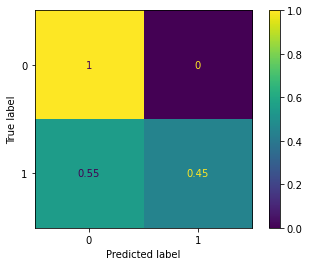

In [1451]:
from sklearn.metrics import plot_confusion_matrix
cm_plot_unbalanced = plot_confusion_matrix(best_model_unbalanced_rf,X_test,y_test,normalize ='true')
cm_plot_unbalanced

Classification Report for our best Model with Unbalanced Pipeline

In [1452]:

print(classification_report(y_test,best_model_unbalanced_rf.predict(X_test), target_names =["0", "1"],digits=4))


              precision    recall  f1-score   support

           0     0.9418    1.0000    0.9700       259
           1     1.0000    0.4483    0.6190        29

    accuracy                         0.9444       288
   macro avg     0.9709    0.7241    0.7945       288
weighted avg     0.9477    0.9444    0.9347       288



Based  on the confusion matrix and also the classification report,it is clear that the recall and f1 score is quite low , still

Balanced Pipeline with class weight set to Balanced and optimising hyperparameters

In [1453]:
import scipy
from scipy.stats import randint

rf_pipeline_bal = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight ="balanced",random_state=123)
)

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),
}

random_search_bal = RandomizedSearchCV(
    rf_pipeline_bal,
    param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="f1",
    random_state=123,
)
random_search_bal.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['FatContentPercent',
                                                                                'MoisturePercent']),
                                                                              ('pipeline-2',
                                                              

In [1454]:
optimal_parameters_bal = random_search_bal.best_params_
optimal_parameters

optimal_score_bal = random_search_bal.best_score_
optimal_score

optimal_parameters_bal,optimal_score_bal

({'randomforestclassifier__max_depth': 8,
  'randomforestclassifier__n_estimators': 126},
 0.6791431261770245)

As you can see the overall scores (f1 and recall) are much better than baseline Model and it can certainly be a good choice for making our predictions

In [1455]:
best_pipeline_balanced = make_pipeline(preprocessor, 
                              RandomForestClassifier(n_estimators =126,max_depth =8,class_weight = "balanced",random_state=123)
                             )

In [1456]:
best_model_balanced_rf = best_pipeline_balanced.fit(X_train,y_train)

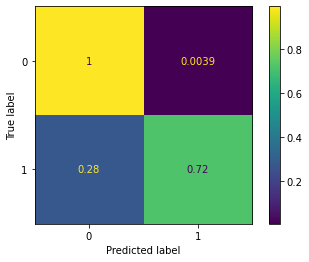

In [1457]:
cm_plot_balanced = plot_confusion_matrix(best_model_balanced_rf,X_test,y_test,normalize ='true')
cm_plot_balanced

In [1458]:
print(classification_report(y_test,best_model_balanced_rf.predict(X_test), target_names =["0", "1"],digits=4))

              precision    recall  f1-score   support

           0     0.9699    0.9961    0.9829       259
           1     0.9545    0.7241    0.8235        29

    accuracy                         0.9688       288
   macro avg     0.9622    0.8601    0.9032       288
weighted avg     0.9684    0.9688    0.9668       288



In [1459]:
print(classification_report(y_train,best_model_balanced_rf.predict(X_train), target_names =["0", "1"],digits=4))

              precision    recall  f1-score   support

           0     0.9878    0.9925    0.9901      1060
           1     0.9070    0.8571    0.8814        91

    accuracy                         0.9818      1151
   macro avg     0.9474    0.9248    0.9357      1151
weighted avg     0.9814    0.9818    0.9815      1151



** Based on the results above, the "best model" with balanced pipeline looks like a good choice to predict our Target Variable. The f1 Scores for our train and test data set is quite close , which means that the model is not under fitting or overfitting and also the recall score for the test data set is also reasonable. This looks like a good choice for predicting our target variable.However let us explore further the Logistic Regressor and check if we can get a better mapping function 

# Logistic Regression - a very Popular Machine Learning Linaear Model

** Creating a best fit logistic regressor to improve F1 and Recall Score 

In [1460]:
from sklearn.linear_model import LogisticRegression

In [1461]:
lr_pipeline = make_pipeline(
    preprocessor, LogisticRegression(max_iter = 2000)
)

In [1462]:
lr_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['FatContentPercent',
                                                   'MoisturePercent']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneH

In [1463]:
lr_scores = cross_validate(lr_pipeline,X_train,y_train, cv=5, scoring =('accuracy','f1','recall','precision'),return_train_score =True)
lr_scores =pd.DataFrame(lr_scores)
lr_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.181468,0.045800,0.969697,0.994565,0.787879,0.964029,0.684211,0.930556,0.928571,1.0
1,0.192719,0.044566,0.965217,0.997828,0.714286,0.986111,0.555556,0.972603,1.000000,1.0
2,0.320759,0.096232,0.960870,0.995657,0.666667,0.971831,0.500000,0.945205,1.000000,1.0
3,0.310260,0.093321,0.956522,0.994571,0.666667,0.964539,0.555556,0.931507,0.833333,1.0
4,0.322859,0.046898,0.965217,0.993485,0.714286,0.957143,0.555556,0.917808,1.000000,1.0


In [1464]:
lr_mean= lr_scores.mean()
lr_mean

fit_time           0.265613
score_time         0.065363
test_accuracy      0.963505
train_accuracy     0.995221
test_f1            0.709957
train_f1           0.968731
test_recall        0.570175
train_recall       0.939536
test_precision     0.952381
train_precision    1.000000
dtype: float64

In [1465]:
print ( "Dummy Model, Mean Test acuuracy", round (dummy_scores_others_mean['test_accuracy'],2))
print ( "Dummy Model, Mean f1 Score", round (dummy_scores_others_mean['test_f1'],2))
print ( "Basic Loogistic Regressor Model, Mean Test accuracy", round (lr_mean['test_accuracy'],2))
print ( "Basic Loogistic Regressor Model, Mean F1 score", round (lr_mean['test_f1'],2))


Dummy Model, Mean Test acuuracy 0.86
Dummy Model, Mean f1 Score 0.09
Basic Loogistic Regressor Model, Mean Test accuracy 0.96
Basic Loogistic Regressor Model, Mean F1 score 0.71


As can be seen above the F1 Score of the basic Logistic Regressor is much better than that of our baseline ( Dummy) Model

** Optimizing Logistic Regressor's performance by tuning hyper parameters and creating best linear regressor model

In [1466]:
param_grid = {
    "logisticregression__C": loguniform(0.01, 100)
}


In [1467]:
random_search=RandomizedSearchCV( lr_pipeline,param_grid,n_iter=10,cv=5, verbose=3, n_jobs=-1,random_state=888,return_train_score = True)
random_search.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] logisticregression__C=27.431049525501745 ........................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  logisticregression__C=27.431049525501745, score=(train=0.999, test=0.974), total=   0.3s
[CV] logisticregression__C=27.431049525501745 ........................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  logisticregression__C=27.431049525501745, score=(train=0.999, test=0.952), total=   0.3s
[CV] logisticregression__C=27.431049525501745 ........................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  logisticregression__C=27.431049525501745, score=(train=1.000, test=0.965), total=   0.2s
[CV] logisticregression__C=27.431049525501745 ........................
[CV]  logisticregression__C=27.431049525501745, score=(train=0.999, test=0.957), total=   0.3s
[CV] logisticregression__C=27.431049525501745 ........................
[CV]  logisticregression__C=27.431049525501745, score=(train=0.999, test=0.974), total=   0.3s
[CV] logisticregression__C=0.045527938026162555 ......................
[CV]  logisticregression__C=0.045527938026162555, score=(train=0.947, test=0.922), total=   0.2s
[CV] logisticregression__C=0.045527938026162555 ......................
[CV]  logisticregression__C=0.045527938026162555, score=(train=0.950, test=0.930), total=   0.2s
[CV] logisticregression__C=0.045527938026162555 ......................
[CV]  logisticregression__C=0.045527938026162555, score=(train=0.946, test=0.930), total=   0.2s
[CV] logisticregression__C=0.045527938026162555 .....................

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.6s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['FatContentPercent',
                                                                                'MoisturePercent']),
                                                                              ('pipeline-2',
                                                              

In [1468]:
optimal_parameters = random_search.best_params_
optimal_parameters


{'logisticregression__C': 27.431049525501745}

In [1469]:
best_score = random_search.best_score_
best_score

0.9643704121964991

In [ ]:
best_model= random_search.best_estimator_
best_model

**Linear Regressor Coefficients -analyzing the best linaear Model

As Logistic Regressor is a linear Model, it assigns a set of coefficients to the features and make a prediction 
based on that, the following code gets the coefficients / weights assigned to various feature by the model. This uses a custom function below ( as it is not a simple preprocessor). Please note that it generates soome warnings for information but executes properly 

In [ ]:
from sklearn.datasets import fetch_openml

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
import sklearn
import pandas as pd

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [ ]:
vocab = get_feature_names(preprocessor)

In [ ]:
#clf.named_steps['classifier'].coef_
best_model.named_steps['logisticregression'].coef_

In [ ]:
#pd.DataFrame(clf.named_steps['classifier'].coef_.flatten(), index=get_feature_names(preprocessor))
coeff_df = pd.DataFrame(best_model.named_steps['logisticregression'].coef_.flatten(), index=get_feature_names(preprocessor))
coeff_df.head(5)

** Creating a Data Frame of Coefficients

In [ ]:

coeff_df_1 = coeff_df.rename_axis('feature').reset_index()
coeff_df_1.columns

In [ ]:
coeff_df_1.rename(columns = {0:'coefficients'}, inplace = True)
coeff_df_1.head(5)


**Top Five Coefficients (Weights) used by tuned linear regressor to make prediction

In [ ]:
coeff_df_sort_values = coeff_df_1.sort_values (by = 'coefficients', ascending = False )
coeff_df_sort_values[:5]

The above coeffiencts ( values in data frame above ) are the weights(top five highest weights) assigned by logistic regressor to various features , hence the model has given highest weightage to the feature Organic created as the result of Transformation of Count Vectorizer of the text columns that was part of the data set 

**Five Coefficients (Weights) given least priority by linear regressor

In [ ]:
coeff_df_sort_values_1 = coeff_df_1.sort_values (by = 'coefficients', ascending = True )
coeff_df_sort_values_1[:5]

The above coeffiencts ( values in data frame above ) are the weights(top five lowest weights) assigned by 
logistic regressor to various features , hence the model has given lowest weightage to the feature Qualicum Cheeseworkcreated as the result of Transformation by one hot encoder of the  that was part of the data set 

**Optimized Linear Regressor Model

In [ ]:
best_model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm_plot_best_linear_regressor = plot_confusion_matrix(best_model,X_test,y_test,normalize ='true')
cm_plot_best_linear_regressor

In [ ]:
print(classification_report(y_test,best_model.predict(X_test), target_names =["1", "0"],digits=4))

In [ ]:
print(classification_report(y_train,best_model.predict(X_train), target_names =["1", "0"],digits=4))

# Our Mapping Function for this Supervised Learning Problem

Based on the above, let us plot the F1 and accuracy Prediction for our Postive Class (Organic)

In [ ]:
lst =['baseline model','Random Forest', 'Linear Regressor']
lst2 =[0.0692,0.8235,0.9885]
df = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Model', 'f1 Score']) 
df 

In [ ]:
plot_f1_score =alt.Chart(df).mark_bar().encode(
                    x =alt.X("Model",sort ='y',title="ML Model"),
                    y= alt.Y("f1 Score:Q",title=" f1 Score")).properties (width =200, height =200)
                    
plot_f1_score

Our positive class in this case is Organic, let us plot how different models predicted our positive class based on confusion matrix above 

In [ ]:
lst2 =['Random Forest', 'Linear Regressor']
lst3 =[0.72,0.79]
df2 = pd.DataFrame(list(zip(lst2, lst3)), 
               columns =['Model', 'correct prediction']) 
df2 

In [ ]:
plot_correct_score =alt.Chart(df2).mark_bar().encode(
                    x =alt.X("Model",sort ='y',title="ML Model"),
                    y= alt.Y("correct prediction:Q",title=" correct prediction")).properties (width =200, height =200)
                    
plot_correct_score

# Concluding Remarks

In this Project I built a predictive answer ( machine learning Model) for predicting if the type of Cheese is Organic or Not based on the Data Set provided to me. Based on my analysis a linear regressor model will be the best predictor / will provide the best answer to this Question. As discussed aabove the F1 Score for Linear Regressor on our test data is quite high as well as based on the confusion matrices plotted above.

# References

Not all work in this notebook is Original. Some of it was burrowed from on-line resources  and from assignments in the course. I take no credit of parts that are not mine.However, without mentioning any specific resources, let me thank all for making my journey of making Machine Learning a Fun.